<a href="https://colab.research.google.com/github/mark-ortiz/03MAIR-Algoritmos-de-Optimizacion-2019/blob/master/AG2/Marco_Ortiz_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Calculo de Tiempos(Isabel Vazques).
from time import time
def calcular_tiempo(f):
   
    def wrapper(*args, **kwargs):        
        inicio = time()       
        resultado = f(*args, **kwargs)       
        tiempo = float(time() - inicio)     
        print("\r\n Tiempo de ejecución para algoritmo: "+"{0:.25f}".format(tiempo))
        return resultado
    
    return wrapper

## Marco Ortiz - AG2
### Actividad Guiada2
Url: https://github.com/mark-ortiz/03MAIR-Algoritmos-de-Optimizacion-2019/tree/master/AG2


In [2]:
import random
import math


N=100

LISTA_2D = [(random.randrange(1,N*10),random.randrange(1,N*10)) for _ in range(N)]

print(LISTA_2D)

[(118, 141), (956, 286), (962, 6), (111, 588), (862, 374), (68, 496), (462, 616), (900, 442), (812, 832), (409, 350), (521, 342), (890, 497), (340, 990), (13, 455), (474, 328), (629, 319), (171, 844), (228, 712), (672, 800), (747, 952), (815, 709), (425, 566), (148, 145), (5, 156), (416, 588), (377, 147), (680, 175), (960, 122), (396, 831), (177, 539), (813, 248), (794, 539), (759, 820), (938, 415), (479, 892), (845, 85), (344, 978), (41, 824), (736, 385), (644, 52), (300, 518), (741, 863), (75, 53), (934, 574), (771, 644), (682, 984), (338, 281), (129, 910), (580, 822), (71, 95), (333, 981), (528, 579), (802, 372), (156, 641), (45, 293), (421, 476), (466, 398), (460, 160), (304, 797), (554, 662), (117, 275), (476, 778), (652, 53), (915, 365), (539, 368), (290, 689), (70, 513), (447, 656), (973, 103), (564, 140), (984, 473), (31, 600), (940, 284), (143, 960), (159, 742), (289, 140), (916, 879), (511, 672), (811, 635), (34, 282), (691, 633), (409, 618), (805, 589), (379, 757), (912, 678

In [3]:
def distancia(A,B):
  if type(A) is int or type(A) is float:
    return abs(B-A)
  else:
    return math.sqrt(sum([ (A[i]-B[i])**2 for i in range(len(A)) ]))

#Probamos con algunos valores la función distancia que se acaba de definir
distancia((1,3),(2,5))

2.23606797749979

In [4]:
#Fuerza Bruta

def distancia_fuerza_bruta(L):
  mejor_distancia = 100000e10
  
  A,B = (),()
  
  for i in range(len(L)):
    for j in range(i+1, len(L)):
      D = distancia(L[i],L[j])
      if D < mejor_distancia:
                A,B=L[i],L[j]
                mejor_distancia = D
  return [A,B]

distancia_fuerza_bruta(LISTA_2D)                

[(644, 52), (652, 53)]

In [5]:
def distancia_divide_y_venceras(L):
  #Si hay pocos por Fuerza Bruta
  if len(L) <10: 
    return  distancia_fuerza_bruta(L)
    
  #Dividir en listas grandes
  #pivite =  sum([L[i][0]for i in range(len(L))]) / len(L)
    
  LISTA_IZQ = sorted(L, key=lambda x: x[0])[:len(L)//2]
  LISTA_DER = sorted(L, key=lambda x: x[0])[len(L)//2:]
  
  PUNTOS_LISTA_IZQ = distancia_divide_y_venceras(LISTA_IZQ)
  PUNTOS_LISTA_DER = distancia_divide_y_venceras(LISTA_DER)
  
  return distancia_fuerza_bruta(PUNTOS_LISTA_IZQ + PUNTOS_LISTA_DER)
  
@calcular_tiempo  
def LANZA(L):
  return distancia_divide_y_venceras(L)
  
SOL = LANZA(LISTA_2D[:1000])

print(SOL)


 Tiempo de ejecución para algoritmo: 0.0008974075317382812500000
[(644, 52), (652, 53)]


In [6]:
TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#Paseo por el rio
def Precios(TARIFAS):
  N = len(TARIFAS[0])
  
  PRECIOS = [ [9999]*N for i in [9999]*N ]
  RUTAS    = [ [""]*N for i in [9999]*N ]
  

  
  for i in range(N-1):
    for j in range(i+1,N):
      MIN = TARIFAS[i][j]
      RUTAS[i][j] = i
      
      for k in range(i,j):
        if PRECIOS[i][k]+ TARIFAS[k][j] < MIN:
          MIN = min( MIN , PRECIOS[i][k]+ TARIFAS[k][j] )
          RUTAS[i][j] = k
      PRECIOS[i][j] = MIN
      
  return PRECIOS, RUTAS

  
PRECIOS, RUTAS = Precios(TARIFAS)

print(PRECIOS)

print()

print(RUTAS)

def calcular_ruta(RUTAS, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTAS, desde, RUTAS[desde][hasta])) +  ',' + str(RUTAS[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTAS, 0,6)

[[9999, 5, 4, 3, 8, 8, 11], [9999, 9999, 999, 2, 3, 8, 7], [9999, 9999, 9999, 1, 6, 4, 7], [9999, 9999, 9999, 9999, 5, 6, 9], [9999, 9999, 9999, 9999, 9999, 999, 4], [9999, 9999, 9999, 9999, 9999, 9999, 3], [9999, 9999, 9999, 9999, 9999, 9999, 9999]]

[['', 0, 0, 0, 1, 2, 5], ['', '', 1, 1, 1, 3, 4], ['', '', '', 2, 3, 2, 5], ['', '', '', '', 3, 3, 3], ['', '', '', '', '', 4, 4], ['', '', '', '', '', '', 5], ['', '', '', '', '', '', '']]

La ruta es:


'0,0,2,5'

#APORTACIÓN EXTRA
A partir de aquí mi aportación para el problema de distancia usando divide y venceras, investigando en Internet encontré este código que me pareció muy bueno y lo adapte un poco, en general lo que hace el código es tomar la misma idea que se presentó en clase de divide y vencerás, pero retocada un poco para tratar de mejorar. <br>

Uno de mis aportes es el haber incluido en el return la distancia y los puntos que son la solución, así como sobre todo hacer la gráfica para visualizar los puntos y observar aquellos que encontró el algoritmos que son los que están más cerca y cuya distancia es mínima.<br>

Al final compararemos usando la función de calculo de tiempos aportada por Isabel Vazques.



In [0]:
import math
import random as rn
import matplotlib.pyplot as plt

#Esta funcion calcula la distancia básica
def dist(p1,p2):
  return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

#Esta es la función que manda a llamar a las otras y otorga la solución
def solution(x,y):
  a = list(zip(x,y)) #Produce la lista de tuplas osea la LISTA2D
  ax = sorted(a, key=lambda x: x[0]) #Ordena con base a X
  ay = sorted(a, key=lambda x: x[1]) #Ordena con base a Y
  p1,p2,mi = closest_pair(ax,ay) #Funcion recursiva
  return mi,p1,p2

#Función recursiva para encontrar el par más cercano
def closest_pair(ax,ay):
  ln_ax=len(ax) # Es mas rapido asignar a una variable la long de ax
  if ln_ax <= 3: #Solo se llama a fuerza bruta para 3 ó menos elementos
    return brute(ax) #LLamada a fuerza bruta
  mid = ln_ax //2 #Division sin residuo para obtener la mitad
  Qx=ax[:mid] #Split (Se divide) en dos partes
  Rx=ax[mid:]
  #Determinamos el punto medio del eje X
  midpoint=ax[mid][0]
  Qy=list()
  Ry=list()
  for x in ay: #Dividimos ay en 2 arreglos usando el punto medio
    if x[0] <= midpoint:
      Qy.append(x)
    else:
      Ry.append(x)
  #Llamada recursiva a ambos arreglos despues del split
  (p1,q1,mi1) = closest_pair(Qx, Qy)
  (p2,q2,mi2) = closest_pair(Rx, Ry)
  #Determinar la distancia mas pequeña entre los puntos de los 2 arreglos
  if mi1<=mi2:
    d=mi1
    mn=(p1,q1)
  else:
    d=mi2
    mn=(p2,q2)
  #LLamamos a la función para contar los puntos del borde
  (p3,q3,mi3) = closest_split_pair(ax,ay,d,mn)
  #Determinar la distancia mas pequeña para el arreglo
  if d <= mi3:
    return mn[0], mn[1], d
  else:
    return p3, q3, mi3

#Función de fuerza bruta que solo calcula para una longitud de 3 y no más
def brute(ax):
  mi=dist(ax[0],ax[1])
  p1=ax[0]
  p2=ax[1]
  ln_ax=len(ax)
  if ln_ax==2:
    return p1,p2,mi
  for i in range(ln_ax-1):
    for j in range(i+1,ln_ax):
      if i != 0 and j!=1:
        d=dist(ax[i], ax[j])
        if d<mi: #Actualizar la dist min y los puntos
          mi=d
          p1,p2=ax[i],ax[j]
  return p1,p2,mi


def closest_split_pair(p_x, p_y, delta, best_pair):
  ln_x=len(p_x) # Almacenamos la longitud - es mas rapido
  mx_x=p_x[ln_x//2][0] #Seleccionamos el punto medio del arr. x ordenado
  #Creamos un subarr de puntos no mas alla del delta del punto medio
  #en el arreglo ordenado x  
  s_y=[x for x in p_y if mx_x - delta <= x[0] <= mx_x + delta]
  best=delta #Asingar el mejor valor a delta
  ln_y=len(s_y) #Almacenar la long de l subarr para rapidez
  for i in range(ln_y-1):
    for j in range(i+1,min(i+7,ln_y)):
      p,q = s_y[i], s_y[j]
      dst=dist(p,q)
      if dst < best:
        best_pair=p,q
        best=dst
  return best_pair[0],best_pair[1],best

La distancia mínima es = 102.12
El Punto 1 es: (9663, 4485)
El Punto 2 es: (9765, 4490)


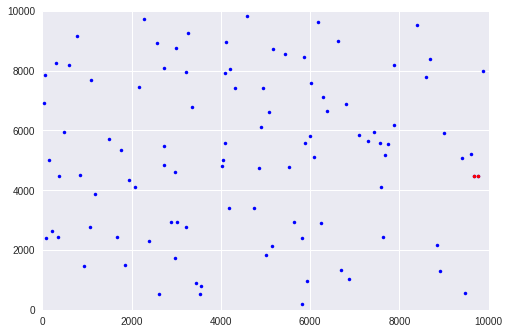

In [8]:
##### PRUEBA DEL CODIGO ARRIBA EXTRA #####

#Establezco la semilla solo para que salgan los mismos valores y verificar
rn.seed(5)

#Genero dos listas cualquiera de 10 valores que seran las coordenadas X e Y
#Aqui se puede modificar N para cualquier valor pero use 100 para mejor
#visibilidad en la gráfica
N=100
X=[rn.randrange(1,10000) for x in range(N)]
Y=[rn.randrange(1,10000) for x in range(N)]

#Ejecuto la función para solución
d,p1,p2=solution(X,Y)
print ("La distancia mínima es = %.2f" %d)
print ("El Punto 1 es:", p1);print ("El Punto 2 es:", p2)

###################################
### Graficamos todos los puntos ###
###################################
plt.plot(X,Y,'b.')
#En rojo ponemos los puntos que encontramos con distancia mínima
plt.plot(p1[0],p1[1],'r.')
plt.plot(p2[0],p2[1],'r.')
#Hacemos que los ejes vayan de 0 a 10000
plt.axis([0,10000,0,10000])
plt.show()